<a href="https://colab.research.google.com/github/deham15/dev_rev_Deham/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #this module is imported to match between two strings and finnd a pattern between those strings
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv("twitter_train.csv")

In [ ]:

df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data Pre-Processing on Training Data Set


In [ ]:
#funtion to remove @user from tweets
def remove_user(tweet):
  tweet=re.sub("@[\w]*","",tweet)
  return tweet




In [ ]:

df['new_tweet']=df['tweet'].apply(remove_user)

In [ ]:

df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
# for removing all characters other than alphabets numbers and white spaces
def remove_characters(new_tweet):
  new_tweet = re.sub(r"[^a-zA-Z0-9\s]","",new_tweet)
  return new_tweet

In [ ]:
df['new_tweet']=df['new_tweet'].apply(remove_characters)

In [ ]:
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
#for lowercasing text
def lowercase(new_tweet):
  new_tweet=new_tweet.lower()
  return new_tweet


In [ ]:

df['new_tweet']=df['new_tweet'].apply(lowercase)

In [ ]:
#for tokenizing text to break it into different words
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize(new_tweet):
    tokens = word_tokenize(new_tweet)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['new_tweet'] = df['new_tweet'].apply(tokenize)

In [ ]:
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, cant, use, caus..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [ ]:
#for stemming words ie converting the words into their root form
from nltk.stem import PorterStemmer
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [ ]:
df['new_tweet'] = df['new_tweet'].apply(stem_tokens)


In [ ]:
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, cant, use, caus,..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

In [ ]:
df["new_tweet"] = df["new_tweet"].apply(remove_stopwords)

In [ ]:
def add_tokens(tokens):
  return " ".join(tokens)

In [ ]:
df['new_tweet']=df['new_tweet'].apply(add_tokens)

In [ ]:
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv


# Data Preprocessing on Test Data Set

In [ ]:
df_test= pd.read_csv("test 2.csv")

In [ ]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
df_test['new_tweet']=df_test['tweet'].apply(remove_user)

In [ ]:
df_test['new_tweet']=df_test['new_tweet'].apply(remove_characters)

In [ ]:

df_test['new_tweet']=df_test['new_tweet'].apply(lowercase)

In [ ]:
df_test['new_tweet'] = df_test['new_tweet'].apply(tokenize)

In [ ]:
df_test['new_tweet'] = df_test['new_tweet'].apply(stem_tokens)


In [ ]:
df_test["new_tweet"] = df_test["new_tweet"].apply(remove_stopwords)

In [ ]:
df_test['new_tweet']=df_test['new_tweet'].apply(add_tokens)

In [ ]:
df_test


,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolif aislif requir passion dedic willpow ...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyon see new bird mo...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acn altwaystoh healthi heal
3,31966,is the hp and the cursed child book up for res...,hp curs child book reserv alreadi ye harrypott...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amaz hilari nephew eli ahmir uncl d...
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factori leftright polaris trump uselec...
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid hairflip neverreadi formal w...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillari campaign today ohioomg amp use word li...
17195,49158,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultureof...


# EDA


In [ ]:
df

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh templ vandalis calgari wso condemn act


In [ ]:
df_test

,id,tweet,new_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolif aislif requir passion dedic willpow ...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyon see new bird mo...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acn altwaystoh healthi heal
3,31966,is the hp and the cursed child book up for res...,hp curs child book reserv alreadi ye harrypott...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amaz hilari nephew eli ahmir uncl d...
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factori leftright polaris trump uselec...
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid hairflip neverreadi formal w...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillari campaign today ohioomg amp use word li...
17195,49158,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultureof...


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


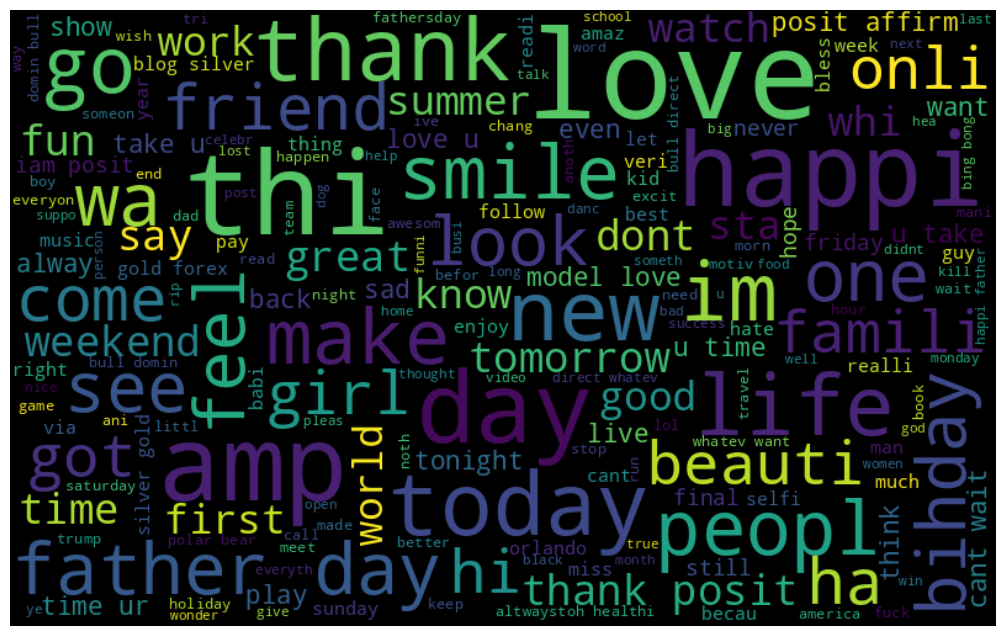

In [ ]:
# visualising most frequent words
all_words = " ".join([sentence for sentence in df['new_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

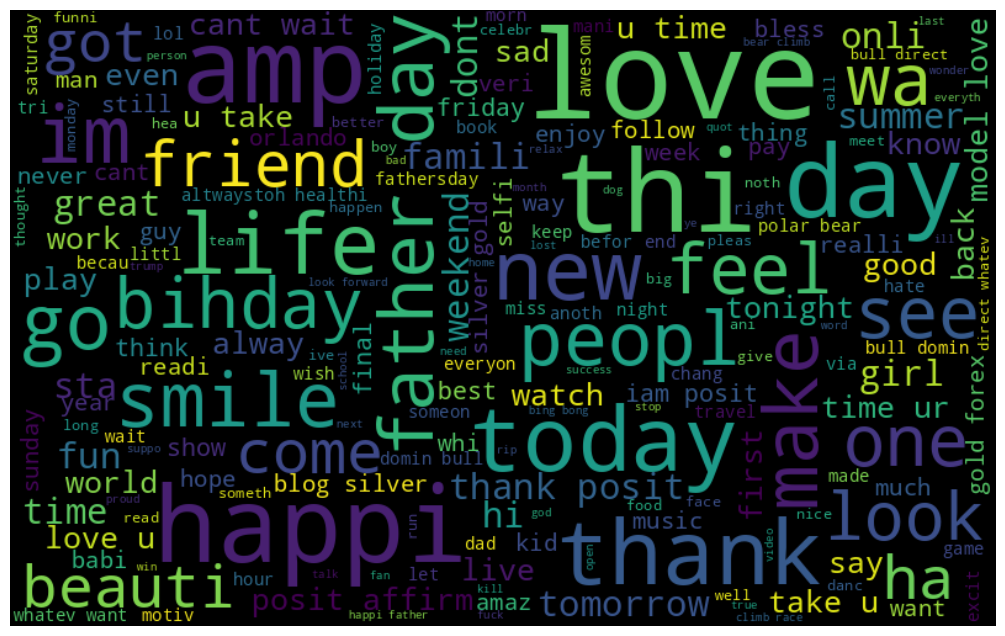

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['new_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

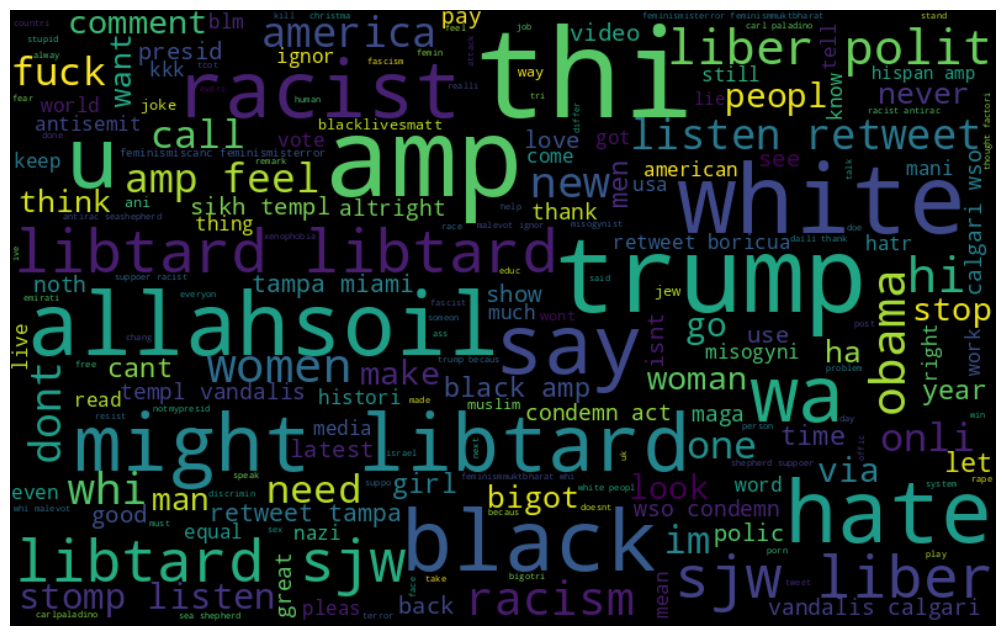

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['new_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Extraction using Word Embeddings


In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")
model.save_word2vec_format("word2vec_google_news_300.bin", binary=True)

In [ ]:
word_embedding_model = KeyedVectors.load_word2vec_format("/content/word2vec_google_news_300.bin", binary=True)

In [ ]:
def get_sentence_embedding(tweet):
    words = tweet.split()
    embeddings = [word_embedding_model[word] for word in words if word in word_embedding_model.key_to_index]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word_embedding_model.vector_size)

In [ ]:
df["tweet_embedding"] = df["new_tweet"].apply(get_sentence_embedding)

In [ ]:
feature_matrix = np.stack(df["tweet_embedding"].to_numpy())

In [ ]:
df.head()

,id,label,tweet,new_tweet,tweet_embedding
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...,"[0.041364398, 0.13720703, 0.01020159, 0.177699..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...,"[0.020465087, -0.018933106, -0.018176269, 0.11..."
2,3,0,bihday your majesty,bihday majesti,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,"[-0.056396484, 0.080671035, 0.08409773, 0.1158..."
4,5,0,factsguide: society now #motivation,factsguid societi motiv,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Training the Model

In [ ]:
df_test["tweet_embedding"] = df_test["new_tweet"].apply(get_sentence_embedding)
feature_matrix_test = np.stack(df_test["tweet_embedding"].to_numpy())

In [ ]:
from sklearn.naive_bayes import GaussianNB
X = feature_matrix
y = df["label"]
model = GaussianNB()
model.fit(X, y)

GaussianNB()

# Predicting the labels in test data set


In [ ]:
X_test=feature_matrix_test

In [ ]:
X_test

array([[-0.00638835, -0.09073893,  0.00602214, ...,  0.01269531,
         0.0139974 ,  0.059611  ],
       [-0.00608317,  0.05779351, -0.01255968, ..., -0.02737734,
         0.02989366, -0.01700846],
       [-0.04423828,  0.2086914 ,  0.03364258, ..., -0.06599121,
         0.01496582,  0.04926758],
       ...,
       [ 0.05675049,  0.03117676,  0.02221222, ..., -0.087146  ,
        -0.05570068,  0.02421875],
       [ 0.00319756,  0.13328722, -0.02189806, ..., -0.0502455 ,
         0.06064182,  0.04115126],
       [ 0.13092041, -0.0657959 , -0.0453186 , ..., -0.13800049,
         0.07821465, -0.06286621]])

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
df_test_final=df_test.drop(['new_tweet'],axis=1)

In [ ]:
df_test_final=df_test_final.drop(['tweet_embedding'],axis=1)